<a href="https://colab.research.google.com/github/oklawyer71/cyber_security/blob/main/Cyber_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing packages

import pandas as pd
from google.colab import files
from google.colab import drive

# Mount drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Reading in the Datasets - Segmented by Category

df_benign = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features_domain_benign_csv.csv")
df_spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Spam.csv")
df_phishing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_phishing.csv")
df_malware = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Malware.csv")

In [3]:
!pip install pycaret[full]

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl (357 kB)
INFO: pip is looking at multiple versions of ydata-profiling to determine which version is compatible with other requirements. This could take a while.
  Using cached ydata_profiling-4.6.0-py2.py3-none-any.whl (357 kB)
  Using cached typeguard-4.1.5-py3-none-any.whl (34 kB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.13.3
    Uninstalling typeguard-2.13.3:
      Successfully uninstalled typeguard-2.13.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.0.0
    Uninstalling ydata-profiling-4.0.0:
      Successfully uninstalled ydata-profiling-4.0.0
ERROR: pip's dependency resolver does not currently take i

In [4]:
import pandas as pd
import pycaret.clustering as pc

In [5]:
# Used a demo colab notebook to help me get the versioning right of ydata profiling as it wasn't working with colab well
  # https://colab.research.google.com/github/Data-Centric-AI-Community/awesome-data-centric-ai/blob/master/medium/data-profiling-tools/notebooks/ydata_profiling_demo.ipynb#scrollTo=5Q28ZTv3y-aJ

!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1



  Using cached ydata_profiling-4.0.0-py2.py3-none-any.whl (344 kB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.6.0
    Uninstalling ydata-profiling-4.6.0:
      Successfully uninstalled ydata-profiling-4.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires matplotlib>=3.6.0, but you have matplotlib 3.5.1 which is incompatible.
plotn

In [6]:
from ydata_profiling import ProfileReport

In [7]:
# Taking a look at the data using the ydata-profiling package

# profile = ProfileReport(df_benign, title="Benign Dataset Profile")

In [8]:
#profile.to_notebook_iframe()

In [10]:
from pycaret.clustering import *

In [81]:
# Adding a categorical column called "Type" to all of them, with the type of record each one represents (i.e. benign, spam, phishing, malware)

df_benign['Type_Cat'] = 'Benign'
df_spam['Type_Cat'] = 'Spam'
df_phishing['Type_Cat'] = 'Phishing'
df_malware['Type_Cat'] = 'Malware'

In [82]:
# Adding a numerical column called "Type" to all of them, with the type of record each one represents (i.e. benign, spam, phishing, malware)

df_benign['Type_Num'] = 0
df_spam['Type_Num'] = 1
df_phishing['Type_Num'] = 2
df_malware['Type_Num'] = 3

In [83]:
# Concatenate

      # List the dataframes

lst = [df_benign, df_spam, df_phishing, df_malware]

      # Call the list in the concatenate function

df_all = pd.concat(lst, ignore_index=True)
df_all

subdomain  tld                sld  len  numeric_percentage  \
0            0.0  com             google    7                 0.0   
1            0.0  com             google    7                 0.0   
2            1.0  com             google   10                 0.0   
3            1.0  com             google   10                 0.0   
4            0.0  com           facebook    9                 0.0   
...          ...  ...                ...  ...                 ...   
50154        0.0  com         kineslince   11                 0.0   
50155        0.0  com         kineslince   11                 0.0   
50156        0.0  com         kineslince   11                 0.0   
50157        0.0  com         kineslince   11                 0.0   
50158        0.0  com  kingsconsolidated   18                 0.0   

                                       char_distribution   entropy  \
0      defaultdict(<class 'int'>, {'g': 2, 'o': 2, 'l...  1.834876   
1      defaultdict(<class 'int'>, {'g': 2, 'o': 2, 'l...  1.834876   
2      defaultdict(<class 'int'>, {'w': 3, 'g': 2, 'o...  2.114247   
3      defaultdict(<class 'int'>, {'w': 3, 'g': 2, 'o...  2.114247   
4      defaultdict(<class 'int'>, {'f': 1, 'a': 1, 'c...  2.595489   
...                                                  ...       ...   
50154  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...  2.599483   
50155  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...  2.599483   
50156  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...  2.599483   
50157  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...  2.599483   
50158  defaultdict(<class 'int'>, {'n': 2, 'c': 1, 'g...  3.382707   

                                                   1gram  \
0                         ['g', 'o', 'o', 'g', 'l', 'e']   
1                         ['g', 'o', 'o', 'g', 'l', 'e']   
2                         ['g', 'o', 'o', 'g', 'l', 'e']   
3                         ['g', 'o', 'o', 'g', 'l', 'e']   
4               ['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']   
...                                                  ...   
50154  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50155  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50156  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50157  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50158  ['k', 'i', 'n', 'g', 's', 'c', 'o', 'n', 's', ...   

                                                   2gram  \
0                         ['go', 'oo', 'og', 'gl', 'le']   
1                         ['go', 'oo', 'og', 'gl', 'le']   
2                         ['go', 'oo', 'og', 'gl', 'le']   
3                         ['go', 'oo', 'og', 'gl', 'le']   
4             ['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']   
...                                                  ...   
50154  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50155  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50156  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50157  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50158  ['ki', 'in', 'ng', 'gs', 'sc', 'co', 'on', 'ns...   

                                                   3gram  ...  \
0                           ['goo', 'oog', 'ogl', 'gle']  ...   
1                           ['goo', 'oog', 'ogl', 'gle']  ...   
2                           ['goo', 'oog', 'ogl', 'gle']  ...   
3                           ['goo', 'oog', 'ogl', 'gle']  ...   
4             ['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']  ...   
...                                                  ...  ...   
50154  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...  ...   
50155  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...  ...   
50156  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...  ...   
50157  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...  ...   
50158  ['kin', 'ing', 'ngs', 'gsc', 'sco', 'con', 'on...  ...   

                       Domain_Age           Organization    State Country  \
0      8088 days, 11:17:15.353226    

In [85]:
# in the above sample / head, we see that there is a mixture of categorical and non-categorical data types (int, float, etc.) so let's check all of the fields

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50159 entries, 0 to 50158
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subdomain                50150 non-null  float64
 1   tld                      50150 non-null  object 
 2   sld                      50142 non-null  object 
 3   len                      50159 non-null  int64  
 4   numeric_percentage       50159 non-null  float64
 5   char_distribution        50159 non-null  object 
 6   entropy                  50159 non-null  float64
 7   1gram                    50159 non-null  object 
 8   2gram                    50159 non-null  object 
 9   3gram                    50159 non-null  object 
 10  longest_word             50138 non-null  object 
 11  distance_from_bad_words  50159 non-null  object 
 12  typos                    50159 non-null  object 
 13  obfuscate_at_sign        50159 non-null  object 
 14  dec_8                 

In [86]:
# Inspect the categorical

df_all.select_dtypes('object').nunique()

tld                          447
sld                        16338
char_distribution          23066
1gram                      16340
2gram                      16330
3gram                      16180
longest_word                8489
distance_from_bad_words    16393
typos                       3184
obfuscate_at_sign              3
shortened                      3
Domain_Name                14915
Registrar                   1034
Registrant_Name              437
Creation_Date_Time         12550
Emails                      5494
Domain_Age                 40148
Organization                4044
State                       1300
Country                      217
Name_Server_Count             59
Type_Cat                       4
Unnamed: 34                    1
dtype: int64

In [87]:
# Inspect the numerical variables
df_all.describe()

subdomain           len  numeric_percentage       entropy    dec_8  \
count  50150.000000  50159.000000        50159.000000  50159.000000  50159.0   
mean       0.444467     13.270779            2.136825      2.727732      0.0   
std        0.496911      7.100263            6.984910      0.610182      0.0   
min        0.000000      1.000000            0.000000      0.000000      0.0   
25%        0.000000      9.000000            0.000000      2.375000      0.0   
50%        0.000000     12.000000            0.000000      2.781301      0.0   
75%        1.000000     16.000000            0.000000      3.141141      0.0   
max        1.000000    155.000000           70.588235      4.766781      0.0   

             dec_32     oc_8        oc_32    hex_8   hex_32    puny_coded  \
count  50159.000000  50159.0  50159.00000  50159.0  50159.0  50159.000000   
mean       0.004426      0.0      0.00008      0.0      0.0      0.004705   
std        0.080991      0.0      0.00893      0.0      0.0      0.068432   
min        0.000000      0.0      0.00000      0.0      0.0      0.000000   
25%        0.000000      0.0      0.00000      0.0      0.0      0.000000   
50%        0.000000      0.0      0.00000      0.0      0.0      0.000000   
75%        0.000000      0.0      0.00000      0.0      0.0      0.000000   
max        4.000000      0.0      1.00000      0.0      0.0      1.000000   

         Alexa_Rank  Page_Rank      Type_Num  
count  4.718300e+04    30625.0  50159.000000  
mean   6.845315e+05       -1.0      1.123507  
std    2.038113e+06        0.0      1.195359  
min   -1.000000e+00       -1.0      0.000000  
25%   -1.000000e+00       -1.0      0.000000  
50%    2.420000e+03       -1.0      1.000000  
75%    1.201860e+05       -1.0      2.000000  
max    1.222468e+07       -1.0      3.000000

In [88]:
# Select the categorical columns
num_cols = df_all.select_dtypes(exclude='object').columns
df_num = df_all[num_cols]
df_num

subdomain  len  numeric_percentage   entropy  dec_8  dec_32  oc_8  \
0            0.0    7                 0.0  1.834876      0       0     0   
1            0.0    7                 0.0  1.834876      0       0     0   
2            1.0   10                 0.0  2.114247      0       0     0   
3            1.0   10                 0.0  2.114247      0       0     0   
4            0.0    9                 0.0  2.595489      0       0     0   
...          ...  ...                 ...       ...    ...     ...   ...   
50154        0.0   11                 0.0  2.599483      0       0     0   
50155        0.0   11                 0.0  2.599483      0       0     0   
50156        0.0   11                 0.0  2.599483      0       0     0   
50157        0.0   11                 0.0  2.599483      0       0     0   
50158        0.0   18                 0.0  3.382707      0       0     0   

       oc_32  hex_8  hex_32  puny_coded  Alexa_Rank  Page_Rank  Type_Num  
0          0      0       0           0         1.0        NaN         0  
1          0      0       0           0         1.0        NaN         0  
2          0      0       0           0         1.0        NaN         0  
3          0      0       0           0         1.0        NaN         0  
4          0      0       0           0         7.0        NaN         0  
...      ...    ...     ...         ...         ...        ...       ...  
50154      0      0       0           0   5173750.0       -1.0         3  
50155      0      0       0           0   5173750.0       -1.0         3  
50156      0      0       0           0   5173750.0       -1.0         3  
50157      0      0       0           0   5173750.0       -1.0         3  
50158      0      0       0           0  10906913.0       -1.0         3  

[50159 rows x 14 columns]

In [89]:
# Select the categorical columns
cols = df_all.select_dtypes('object').columns
df_cat = df_all[cols]

df_cat

tld                sld  \
0      com             google   
1      com             google   
2      com             google   
3      com             google   
4      com           facebook   
...    ...                ...   
50154  com         kineslince   
50155  com         kineslince   
50156  com         kineslince   
50157  com         kineslince   
50158  com  kingsconsolidated   

                                       char_distribution  \
0      defaultdict(<class 'int'>, {'g': 2, 'o': 2, 'l...   
1      defaultdict(<class 'int'>, {'g': 2, 'o': 2, 'l...   
2      defaultdict(<class 'int'>, {'w': 3, 'g': 2, 'o...   
3      defaultdict(<class 'int'>, {'w': 3, 'g': 2, 'o...   
4      defaultdict(<class 'int'>, {'f': 1, 'a': 1, 'c...   
...                                                  ...   
50154  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...   
50155  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...   
50156  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...   
50157  defaultdict(<class 'int'>, {'n': 2, 'i': 2, 'c...   
50158  defaultdict(<class 'int'>, {'n': 2, 'c': 1, 'g...   

                                                   1gram  \
0                         ['g', 'o', 'o', 'g', 'l', 'e']   
1                         ['g', 'o', 'o', 'g', 'l', 'e']   
2                         ['g', 'o', 'o', 'g', 'l', 'e']   
3                         ['g', 'o', 'o', 'g', 'l', 'e']   
4               ['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']   
...                                                  ...   
50154  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50155  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50156  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50157  ['k', 'i', 'n', 'e', 's', 'l', 'i', 'n', 'c', ...   
50158  ['k', 'i', 'n', 'g', 's', 'c', 'o', 'n', 's', ...   

                                                   2gram  \
0                         ['go', 'oo', 'og', 'gl', 'le']   
1                         ['go', 'oo', 'og', 'gl', 'le']   
2                         ['go', 'oo', 'og', 'gl', 'le']   
3                         ['go', 'oo', 'og', 'gl', 'le']   
4             ['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']   
...                                                  ...   
50154  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50155  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50156  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50157  ['ki', 'in', 'ne', 'es', 'sl', 'li', 'in', 'nc...   
50158  ['ki', 'in', 'ng', 'gs', 'sc', 'co', 'on', 'ns...   

                                                   3gram  longest_word  \
0                           ['goo', 'oog', 'ogl', 'gle']        google   
1                           ['goo', 'oog', 'ogl', 'gle']        google   
2                           ['goo', 'oog', 'ogl', 'gle']        google   
3                           ['goo', 'oog', 'ogl', 'gle']        google   
4             ['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']      facebook   
...                                                  ...           ...   
50154  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...          ince   
50155  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...          ince   
50156  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...          ince   
50157  ['kin', 'ine', 'nes', 'esl', 'sli', 'lin', 'in...          ince   
50158  ['kin', 'ing', 'ngs', 'gsc', 'sco', 'con', 'on...  consolidated   

                                 distance_from_bad_words  \
0                         {'google': 5.9147727272727275}   
1                         {'google': 5.9147727272727275}   
2                         {'google': 5.9147727272727275}   
3                         {'google': 5.9147727272727275}   
4                        {'facebook': 7.320075757575758}   
...                                                  ...   
50154  {'kin': 5.143939393939394, 'ince': 5.172348484...   
50155  {'kin': 5.143939393939394, 'ince': 5.172348484...   
50156  {'kin': 5.1

In [90]:
# let's check what the data looks like in terms of nulls

df_cat.isna().sum()
df_num.isna().sum()

subdomain                 9
len                       0
numeric_percentage        0
entropy                   0
dec_8                     0
dec_32                    0
oc_8                      0
oc_32                     0
hex_8                     0
hex_32                    0
puny_coded                0
Alexa_Rank             2976
Page_Rank             19534
Type_Num                  0
dtype: int64

In [91]:
df_num = df_num.fillna(0)
df_num.isna().sum()

subdomain             0
len                   0
numeric_percentage    0
entropy               0
dec_8                 0
dec_32                0
oc_8                  0
oc_32                 0
hex_8                 0
hex_32                0
puny_coded            0
Alexa_Rank            0
Page_Rank             0
Type_Num              0
dtype: int64

In [92]:
cluster_num = setup(df_num, normalize = True, session_id = 123)

In [104]:
# Creating the model

model_num = create_model('kmeans', num_clusters=8)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [105]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [106]:
# Plotting the model

plot_model(model_num, 'cluster', feature = 'Type_Num')

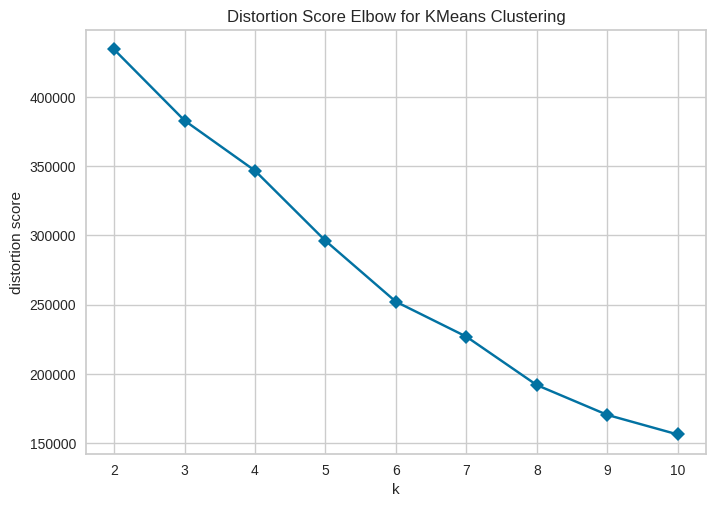

In [107]:
plot_model(model_num, 'elbow', feature = 'Type_Num')

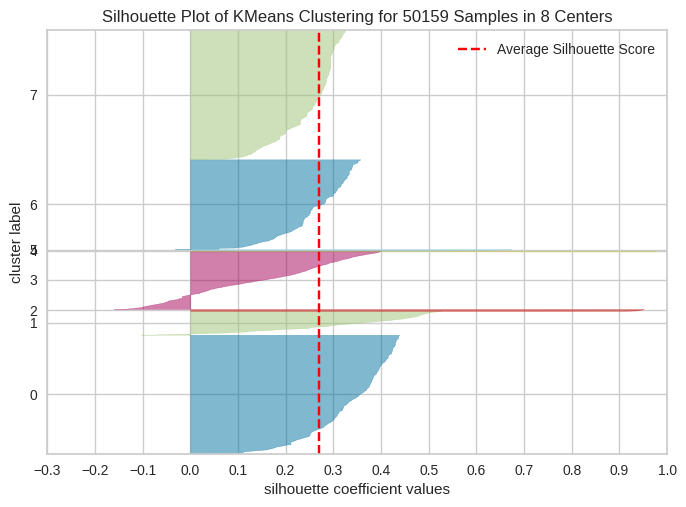

In [108]:
plot_model(model_num, plot='silhouette')

In [109]:
plot_model(model_num, plot = 'distribution', feature = 'Type_Num')

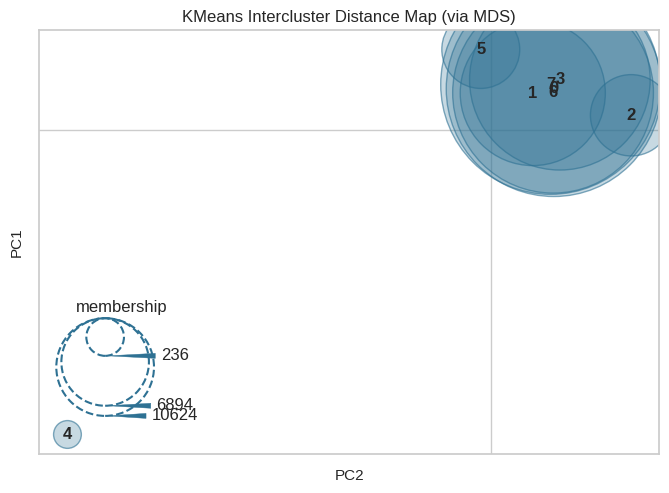

In [112]:
plot_model(model_num, plot='distance', feature = 'Type_Num')

In [34]:
# CATEGORICAL
  # found a better way to cluster the categorical objects we have, since we have so many -- Gower
  # https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance

In [113]:
!pip install gower

In [115]:
import gower

distance_matrix = gower.gower_matrix(df_cat)

distance_matrix

KeyboardInterrupt: ignored

In [37]:
# Setting up the cluster for the k-means

cluster = setup(distance_matrix, normalize = True, session_id = 123)

In [38]:
# Creating the model

model = create_model('kmeans')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [40]:
# Plotting the model

plot_model(model, 'cluster')

In [41]:
# plot_model(model, plot='silhouette')

In [42]:
# As mentioned above, believe we should look at the data through Association Rule Mining and Dimensionality Reduction

In [43]:
#plot_model(model, plot='elbow')